In [78]:
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [79]:
file_path = "../data/adult.csv"
df = pd.read_csv(file_path, na_values="?", index_col=0)
df = df.dropna()

data_correctness = (
    (df["salary"] == "<=50K") & (df["salary K$"] <= 50) |
    (df["salary"] == ">50K") & (df["salary K$"] > 50)
 )
data_correctness.all()

True

# Task 1
Print the count of men and women in the dataset.

In [80]:
df["sex"].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [81]:
df[df["sex"] == "Male"]["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [82]:
(df["native-country"] == "Poland").mean() * 100

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [83]:
df[(df["salary"] == ">50K") & (df["salary K$"] > 50)]["age"].mean()
df[(df["salary"] == ">50K") & (df["salary K$"] > 50)]["age"].std()

df[(df["salary"] == "<=50K") & (df["salary K$"] <= 50)]["age"].mean()
df[(df["salary"] == "<=50K") & (df["salary K$"] <= 50)]["age"].std()

13.464631257161633

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [84]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
len(df[(~df["education"].isin(higher_education)) & (df["salary K$"] > 50)])

3178

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [85]:
df["age"].groupby(df["education"]).describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [86]:
df_male = df[df["sex"] == "Male"]

df_married = df_male[df_male["marital-status"].str.startswith("Married")]
print("Married men salaries:")
print(df_married["salary"].value_counts())

df_non_married = df_male[~df_male["marital-status"].str.startswith("Married")]
print("Non-married men salaries:")
print(df_non_married["salary"].value_counts())

Married men salaries:
salary
<=50K    7052
>50K     5723
Name: count, dtype: int64
Non-married men salaries:
salary
<=50K    6932
>50K      673
Name: count, dtype: int64


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [87]:
max_hours_per_week = df["hours-per-week"].max()
print(f"Max hours per week: {max_hours_per_week}")

df[df["hours-per-week"] == max_hours_per_week].shape[0]

Max hours per week: 99


78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight their connection.

                     age  hours-per-week  salary K$
age             1.000000        0.101599   0.208203
hours-per-week  0.101599        1.000000   0.196378
salary K$       0.208203        0.196378   1.000000


<Figure size 1200x800 with 0 Axes>

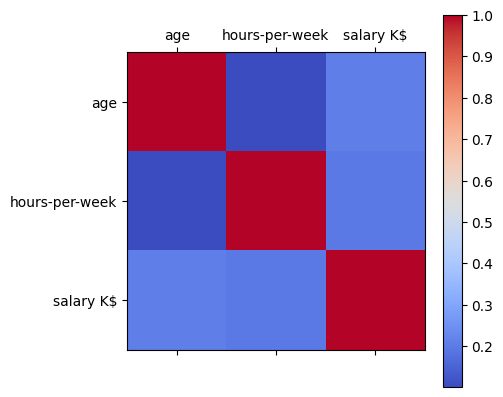

In [88]:
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

print(correlation_matrix)

plt.figure(figsize=(12, 8))
heatmap = plt.matshow(correlation_matrix, cmap="coolwarm")
plt.colorbar(heatmap)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()